In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps


In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### Load Data

In [3]:
#Load .csv & exclude aggregated footer data
#url = 'https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv'
#df =  pd.read_csv(url,encoding='ANSI',skipfooter=5,engine='python',na_values=['.', 'n/a'])
df = pd.read_csv('london-borough-profiles.csv',
                 skipfooter=5, engine='python',
                 na_values=['.', 'n/a'], encoding= 'latin-1')
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3000,43.2000,11.4000,73.1000,...,6.0000,5.6000,NaN,2.6000,129,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9000,32.9000,27.2000,63.1000,...,7.1000,3.1000,28.5000,7.3000,228,Lab,0.0000,100.0000,0.0000,36.5000
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9000,37.3000,21.1000,64.9000,...,7.4000,2.8000,20.7000,6.0000,134,Cons,50.8000,NaN,1.6000,40.5000
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3000,39.0000,20.6000,62.9000,...,7.2000,3.3000,22.7000,6.9000,164,Cons,71.4000,23.8000,0.0000,39.6000
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8000,35.6000,20.9000,67.8000,...,7.2000,2.9000,24.3000,7.9000,169,Lab,9.5000,88.9000,1.6000,36.3000


# Regression model A
## Data preparation

In [4]:
cols=df.columns
print(cols)
print(f"The dataset has {len(cols)} columns/variables")

Index(['Code', 'Area_name', 'Inner/_Outer_London',
       'GLA_Population_Estimate_2017', 'GLA_Household_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', 'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_

In [6]:
colsA= ['Area_name',
        'Unemployment_rate_(2015)',
        'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
        'Total_carbon_emissions_(2014)',
        'Life_satisfaction_score_2011-14_(out_of_10)']

In [7]:
dfA= df[colsA]
dfA.set_index('Area_name', inplace=True)
dfA.head()


,Unemployment_rate_(2015),Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,Total_carbon_emissions_(2014),Life_satisfaction_score_2011-14_(out_of_10)
Area_name,,,,
City of London,NaN,NaN,1036,6.6000
Barking and Dagenham,11.0000,32.2000,644,7.1000
Barnet,8.5000,49.0000,1415,7.5000
Bexley,7.6000,33.5000,975,7.4000
Brent,7.5000,45.1000,1175,7.3000


In [8]:
dfA = dfA.rename(columns={'Area_name':'Borough',
                          'Unemployment_rate_(2015)':'Total Unemployment Rate',
                          'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015':'% working age with education',
                          'Total_carbon_emissions_(2014)':'Total carbon emissions',
                          'Life_satisfaction_score_2011-14_(out_of_10)':'Life satiscaction score'})

In [9]:
dfA.isna().sum().sort_values(ascending=True)

Total carbon emissions          0
Life satiscaction score         0
Total Unemployment Rate         1
% working age with education    1
dtype: int64

In [10]:
dfA.dropna(inplace=True)

In [11]:
dfA.shape

(32, 4)

## quick plots to look at data

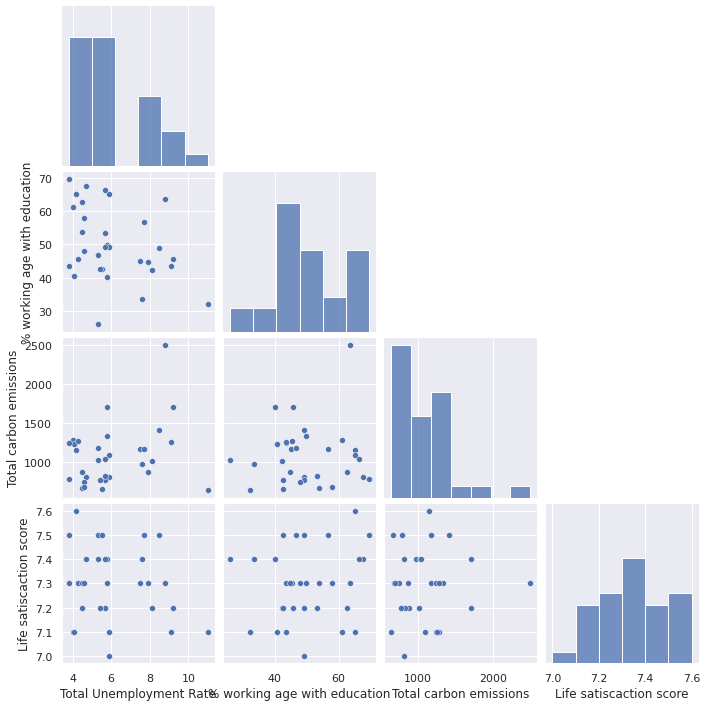

In [12]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)

A = sn.pairplot(dfA, corner=True)

In [ ]:
# check multicolinearity


Text(0.5, 1.0, 'Correlation Matrix')

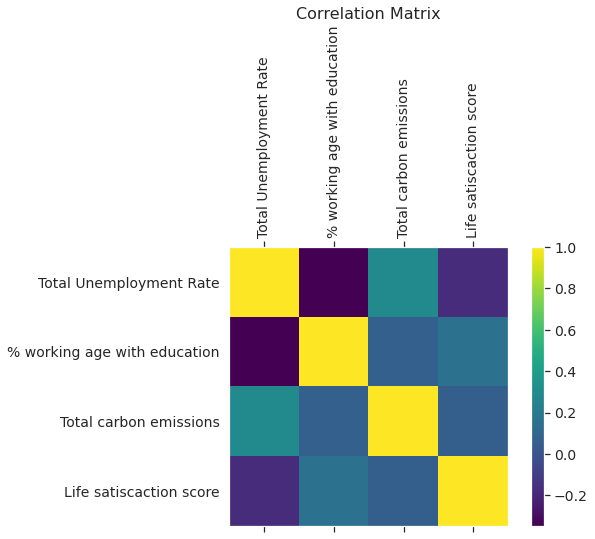

In [13]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8, 5))
plt.matshow(dfA.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(dfA.shape[1]), dfA.columns, fontsize=14, rotation=90)
plt.yticks(range(dfA.shape[1]), dfA.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

According to the correlation matrix above, correlation is below 0.75 for all variables

## Building the model 

In [14]:
dfA.columns

Index(['Total Unemployment Rate', '% working age with education',
       'Total carbon emissions', 'Life satiscaction score'],
      dtype='object')

In [15]:
cols_ind=['% working age with education',
       'Total carbon emissions', 'Life satiscaction score']

In [16]:
ind_vars = dfA[cols_ind]
ind_vars.head()

,% working age with education,Total carbon emissions,Life satiscaction score
Area_name,,,
Barking and Dagenham,32.2000,644,7.1000
Barnet,49.0000,1415,7.5000
Bexley,33.5000,975,7.4000
Brent,45.1000,1175,7.3000
Bromley,46.7000,1180,7.5000


In [17]:
model_dfA = sm.OLS(endog=dfA[['Total Unemployment Rate']], exog=sm.add_constant(ind_vars)).fit()
model_dfA.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total Unemployment Rate   R-squared:                       0.238
Model:                                 OLS   Adj. R-squared:                  0.156
Method:                      Least Squares   F-statistic:                     2.911
Date:                     Tue, 07 Dec 2021   Prob (F-statistic):             0.0519
Time:                             16:25:26   Log-Likelihood:                -60.812
No. Observations:                       32   AIC:                             129.6
Df Residuals:                           28   BIC:                             135.5
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           20.1272     15.238      1.321      0.197     -11.086      51.340
% working age with education    -0.0593      0.029     -2.066      0.048      -0.118      -0.000
Total carbon emissions           0.0016      0.001      1.944      0.062   -8.46e-05       0.003
Life satiscaction score         -1.7538      2.113     -0.830      0.414      -6.082       2.574
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.290
Skew:                           0.233   Prob(JB):                        0.865
Kurtosis:                       2.975   Cond. No.                     5.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residuals vs fit plot

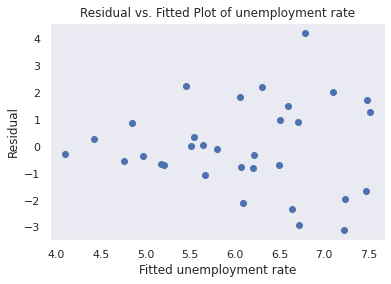

In [34]:
# plot 
plt.scatter(model_dfA.fittedvalues, model_dfA.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

# Regression model B

In [ ]:
'''
List of potential independent variables

draft =['Area_name', 
        'Unemployment_rate_(2015)',
       'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
       '%_of_employment_that_is_in_public_sector_(2014)', 
       'Jobs_Density,_2015',
       'Crime_rates_per_thousand_population_2014/15',
       'Median_House_Price,_2015',
       'Total_carbon_emissions_(2014)',
       'Average_Public_Transport_Accessibility_score,_2014',
       'Life_satisfaction_score_2011-14_(out_of_10)']
'''

In [19]:
colsB =['Area_name', 
        'Unemployment_rate_(2015)',
       'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015', 
       'Jobs_Density,_2015',
       'Crime_rates_per_thousand_population_2014/15',
       'Median_House_Price,_2015']

In [20]:
dfB= df[colsB]

In [21]:
dfB.set_index('Area_name', inplace=True)
dfB.dropna(inplace=True)
dfB.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unemployment_rate_(2015),Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Jobs_Density,_2015",Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015"
Area_name,,,,,
Barking and Dagenham,11.0000,32.2000,0.5000,83.4000,243500
Barnet,8.5000,49.0000,0.7000,62.7000,445000
Bexley,7.6000,33.5000,0.6000,51.8000,275000
Brent,7.5000,45.1000,0.6000,78.8000,407250
Bromley,5.3000,46.7000,0.6000,64.1000,374975


In [22]:
dfB.rename(columns={'Area_name':'Borough',
                    'Unemployment_rate_(2015)':'unempl rate',
                    'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015':'% working with degree',
                    'Jobs_Density,_2015':"jobs density",
                    'Crime_rates_per_thousand_population_2014/15': 'crime rate',
                    'Median_House_Price,_2015': 'median house price',
                    'Average_Public_Transport_Accessibility_score,_2014': "public transp score" 
                   }, inplace=True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Quick plots to visualise variables

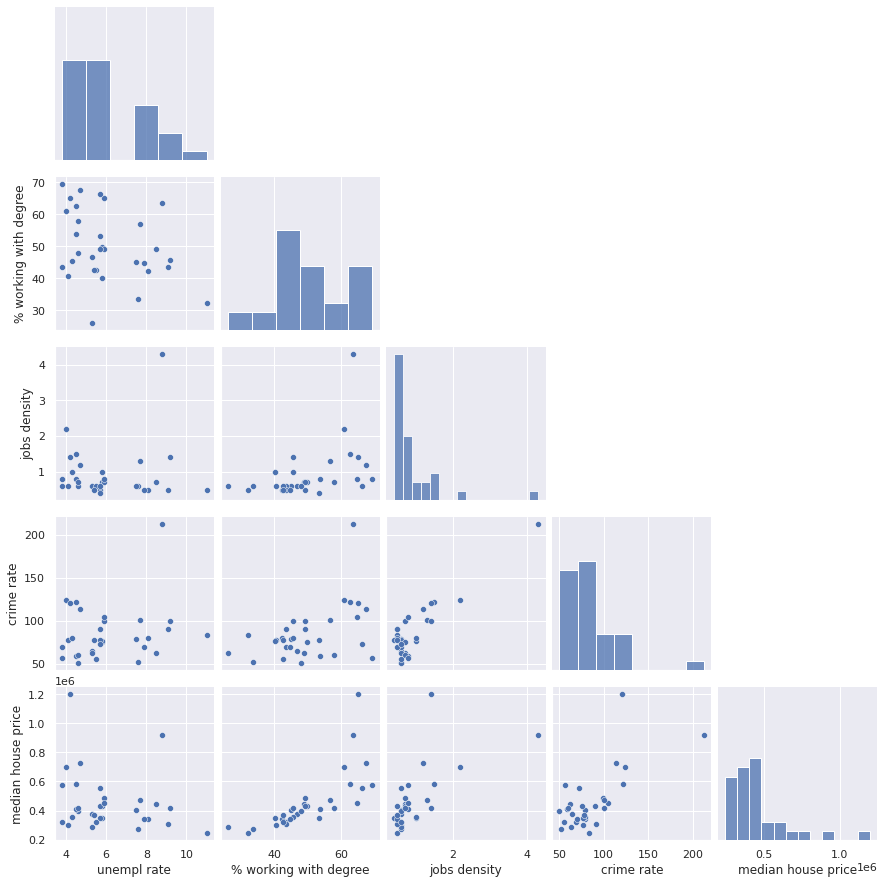

In [23]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)

g = sn.pairplot(dfB, corner=True)

Text(0.5, 1.0, 'Correlation Matrix')

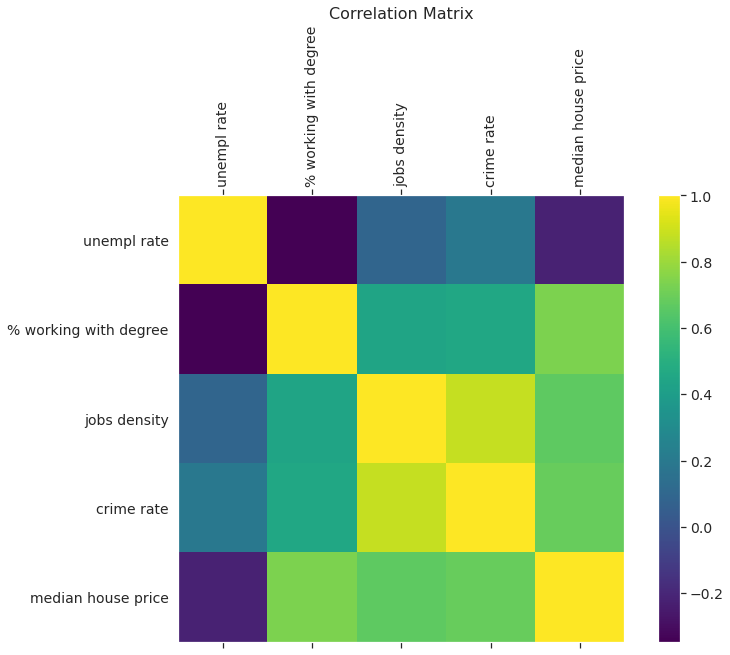

In [24]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(dfB.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(dfB.shape[1]), dfB.columns, fontsize=14, rotation=90)
plt.yticks(range(dfB.shape[1]), dfB.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### VIF

In [25]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [26]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(dfB.drop('unempl rate', axis=1), thresh=4)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: crime rate
The columns remaining after VIF selection are:
Index(['% working with degree', 'jobs density', 'median house price'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
df_predictors_selected_VIF.head()

,% working with degree,jobs density,median house price
Area_name,,,
Barking and Dagenham,32.2000,0.5000,243500
Barnet,49.0000,0.7000,445000
Bexley,33.5000,0.6000,275000
Brent,45.1000,0.6000,407250
Bromley,46.7000,0.6000,374975


In [ ]:
### Visualise the relationshop between remaining variables

In [28]:
#first drop the crime rate variable from dfB
dfB.drop('crime rate', axis=1, inplace=True)
dfB.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,unempl rate,% working with degree,jobs density,median house price
Area_name,,,,
Barking and Dagenham,11.0000,32.2000,0.5000,243500
Barnet,8.5000,49.0000,0.7000,445000
Bexley,7.6000,33.5000,0.6000,275000
Brent,7.5000,45.1000,0.6000,407250
Bromley,5.3000,46.7000,0.6000,374975


### check if taking the log of house prices and job density gives a better scatter plot

In [ ]:
# why log job density?

In [30]:
dfB["ln_median house price"]= np.log(dfB["median house price"])
dfB["ln_jobs density"]= np.log(dfB["jobs density"])
dfB.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,unempl rate,% working with degree,jobs density,median house price,ln_median house price,ln_jobs density
Area_name,,,,,,
Barking and Dagenham,11.0000,32.2000,0.5000,243500,12.4029,-0.6931
Barnet,8.5000,49.0000,0.7000,445000,13.0058,-0.3567
Bexley,7.6000,33.5000,0.6000,275000,12.5245,-0.5108
Brent,7.5000,45.1000,0.6000,407250,12.9172,-0.5108
Bromley,5.3000,46.7000,0.6000,374975,12.8346,-0.5108


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ln_median house price', ylabel='unempl rate'>

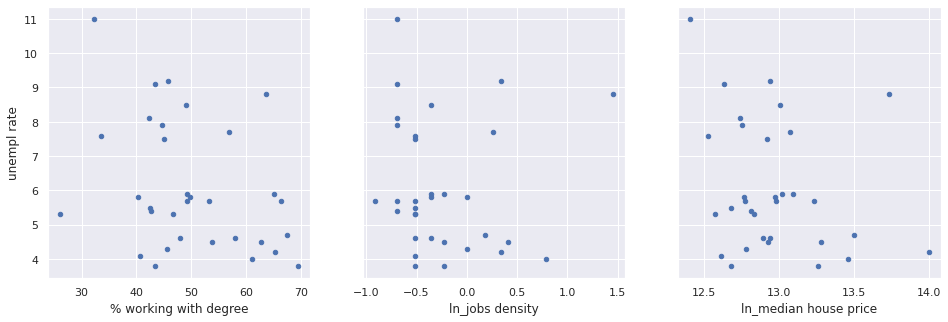

In [31]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(1, 3, sharey=True)
dfB.plot(kind='scatter', x='% working with degree', y='unempl rate', ax=axs[0], figsize=(16, 5))
dfB.plot(kind='scatter', x='ln_jobs density', y='unempl rate', ax=axs[1])
dfB.plot(kind='scatter', x='ln_median house price', y='unempl rate', ax=axs[2])

Text(0, 0.5, 'frequency')

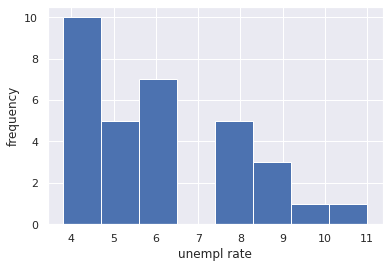

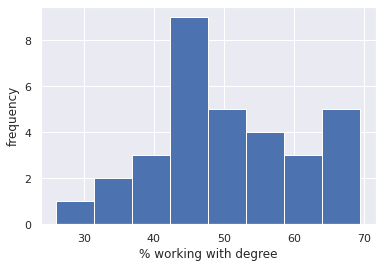

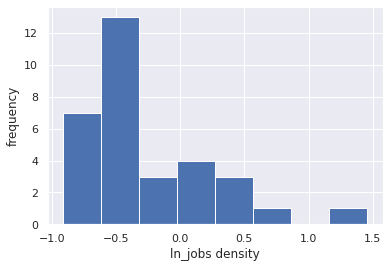

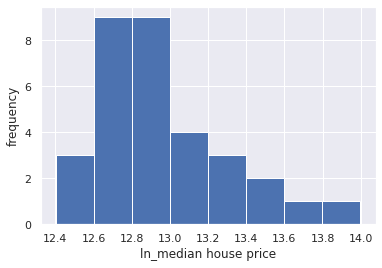

In [32]:
plt.figure(1)
dfB['unempl rate'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('unempl rate')
plt.ylabel("frequency")
#plt.savefig("hist.png")

plt.figure(2)
dfB['% working with degree'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('% working with degree')
plt.ylabel("frequency")

plt.figure(3)
dfB['ln_jobs density'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('ln_jobs density')
plt.ylabel("frequency")

plt.figure(4)
dfB['ln_median house price'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('ln_median house price')
plt.ylabel("frequency")


### create new dataframe with updated variabels

In [33]:
dfB.columns.values

array(['unempl rate', '% working with degree', 'jobs density',
       'median house price', 'ln_median house price', 'ln_jobs density'],
      dtype=object)

In [34]:
colsC=['unempl rate', '% working with degree', 'ln_jobs density', 'ln_median house price']

In [35]:
dfC= dfB[colsC]
dfC.head()

,unempl rate,% working with degree,ln_jobs density,ln_median house price
Area_name,,,,
Barking and Dagenham,11.0000,32.2000,-0.6931,12.4029
Barnet,8.5000,49.0000,-0.3567,13.0058
Bexley,7.6000,33.5000,-0.5108,12.5245
Brent,7.5000,45.1000,-0.5108,12.9172
Bromley,5.3000,46.7000,-0.5108,12.8346


In [36]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(dfC.drop('unempl rate', axis=1), thresh=5)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: ln_median house price
The columns remaining after VIF selection are:
Index(['% working with degree', 'ln_jobs density'], dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
#df_predictors_selected_VIF= dfC.drop('Unempl Rate', axis=1)


In [37]:
model_dfC = sm.OLS(endog=dfC[['unempl rate']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_dfC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            unempl rate   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.474
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.102
Time:                        17:12:00   Log-Likelihood:                -62.635
No. Observations:                  32   AIC:                             131.3
Df Residuals:                      29   BIC:                             135.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.0771      1.865      5.404      0.000       6.263      13.891
% working with degree    -0.0764      0.035     -2.208      0.035      -0.147      -0.006
ln_jobs density           0.6953      0.749      0.929      0.361      -0.836       2.227
==============================================================================
Omnibus:                        2.122   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.669
Skew:                           0.394   Prob(JB):                        0.434
Kurtosis:                       2.206   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual analysis- Model B

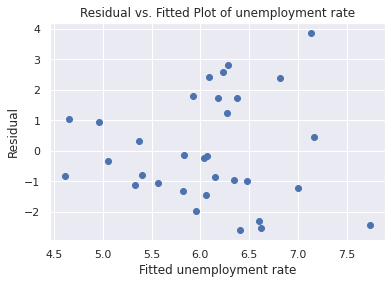

In [38]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
plt.scatter(model_dfC.fittedvalues, model_dfC.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

# Residual vs predictor plot 
## % working with degree

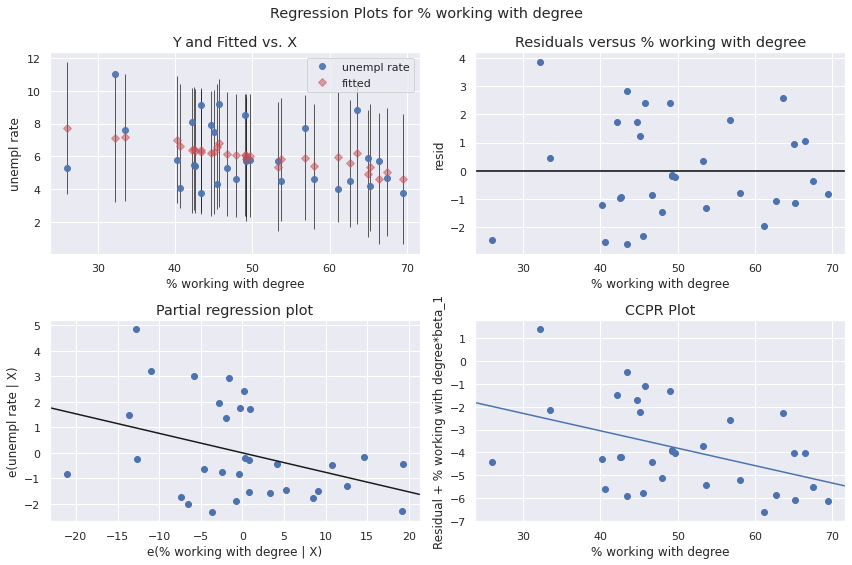

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_dfC, '% working with degree', fig=fig)

# Model D

In [40]:
colsD = ['Area_name','Unemployment_rate_(2015)',
         '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
         '%_of_population_from_BAME_groups_(2016)', 
         'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
         'Average_Public_Transport_Accessibility_score,_2014']

In [41]:
dfD=df[colsD]
dfD.set_index("Area_name", inplace=True)
dfD.dropna(inplace=True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [42]:
dfD.head()

,Unemployment_rate_(2015),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),%_of_population_from_BAME_groups_(2016),Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Average_Public_Transport_Accessibility_score,_2014"
Area_name,,,,,
Barking and Dagenham,11.0000,18.7000,49.5000,32.2000,3.0000
Barnet,8.5000,23.4000,38.7000,49.0000,3.0000
Bexley,7.6000,6.0000,21.4000,33.5000,2.6000
Brent,7.5000,37.2000,64.9000,45.1000,3.7000
Bromley,5.3000,5.8000,18.9000,46.7000,2.8000


In [43]:
dfD.rename(columns={'Area_name':'Borough',
                    'Unemployment_rate_(2015)':'unempl rate',
                    'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015':'% working with degree',
                    '%_of_population_from_BAME_groups_(2016)':"% BAME population",
                    '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)': '% non English language',
                    'Average_Public_Transport_Accessibility_score,_2014': "public transp score" 
                   }, inplace=True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


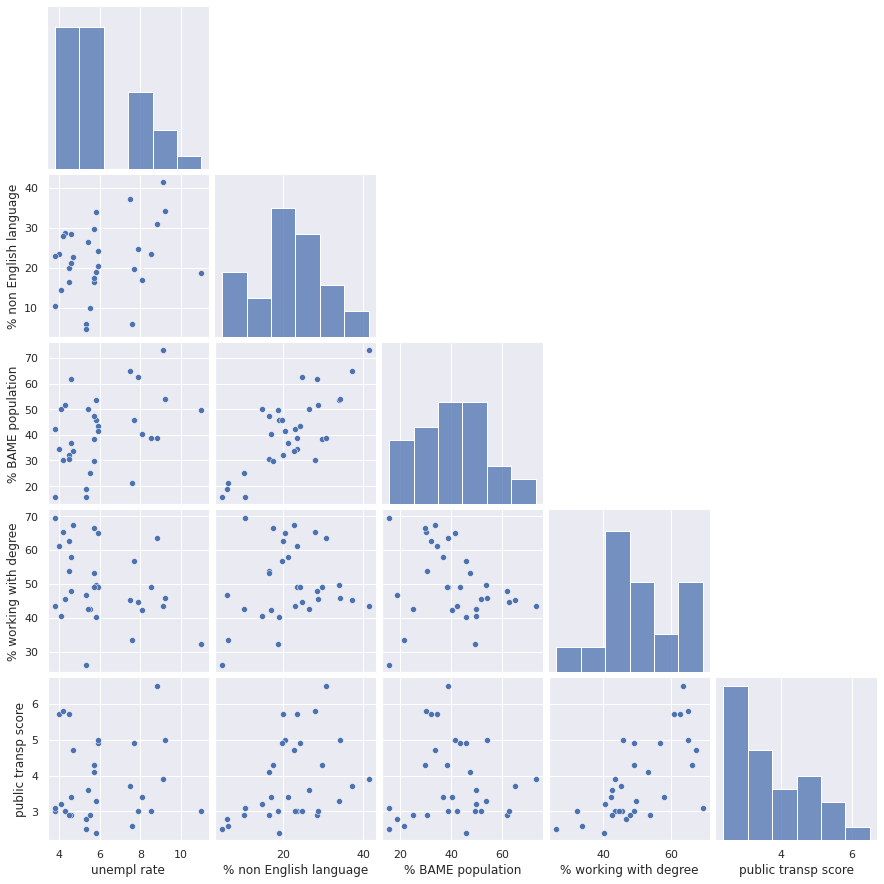

In [44]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)

g = sn.pairplot(dfD, corner=True)

Text(0.5, 1.0, 'Correlation Matrix')

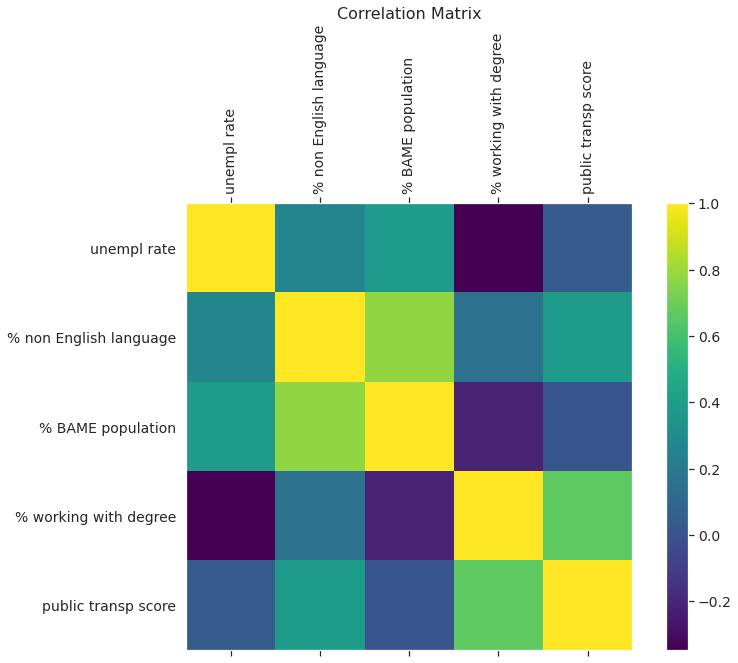

In [46]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(dfD.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(dfD.shape[1]), dfD.columns, fontsize=14, rotation=90)
plt.yticks(range(dfD.shape[1]), dfD.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [47]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(dfD.drop('unempl rate', axis=1), thresh=5)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['% non English language', '% BAME population', '% working with degree',
       'public transp score'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
df_predictors_selected_VIF.head()

,% non English language,% BAME population,% working with degree,public transp score
Area_name,,,,
Barking and Dagenham,18.7000,49.5000,32.2000,3.0000
Barnet,23.4000,38.7000,49.0000,3.0000
Bexley,6.0000,21.4000,33.5000,2.6000
Brent,37.2000,64.9000,45.1000,3.7000
Bromley,5.8000,18.9000,46.7000,2.8000


### Visualise the relationshop between remaining variables

In [49]:
#first drop the crime rate variable from dfB
#dfD.drop("% non English language", axis=1, inplace=True)
dfD.head()

,unempl rate,% non English language,% BAME population,% working with degree,public transp score
Area_name,,,,,
Barking and Dagenham,11.0000,18.7000,49.5000,32.2000,3.0000
Barnet,8.5000,23.4000,38.7000,49.0000,3.0000
Bexley,7.6000,6.0000,21.4000,33.5000,2.6000
Brent,7.5000,37.2000,64.9000,45.1000,3.7000
Bromley,5.3000,5.8000,18.9000,46.7000,2.8000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:xlabel='public transp score', ylabel='unempl rate'>

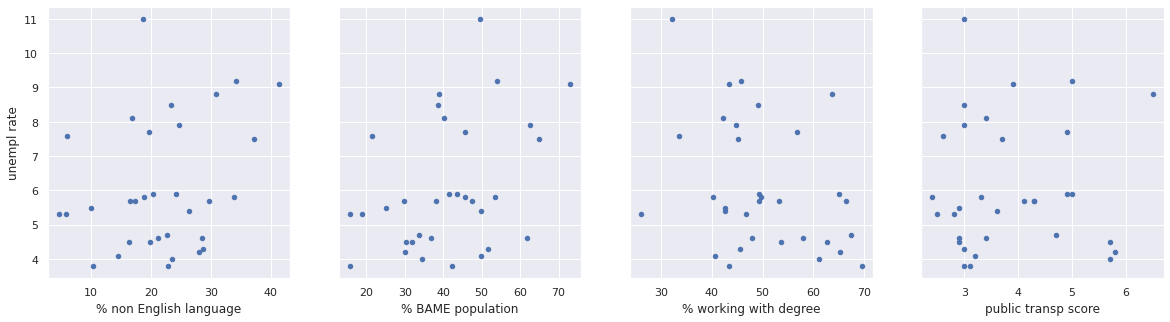

In [50]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(1, 4, sharey=True,figsize=(20, 5))
dfD.plot(kind='scatter', x='% non English language', y='unempl rate', ax=axs[0])
dfD.plot(kind='scatter', x='% BAME population', y='unempl rate', ax=axs[1])
dfD.plot(kind='scatter', x='% working with degree', y='unempl rate', ax=axs[2])
dfD.plot(kind='scatter', x='public transp score', y='unempl rate', ax=axs[3])

Text(0, 0.5, 'frequency')

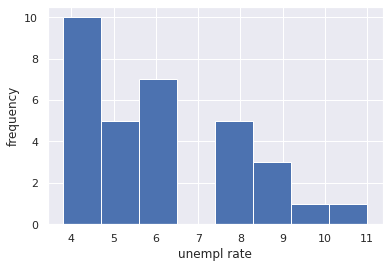

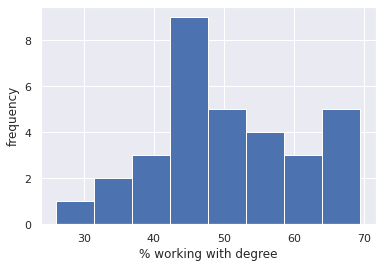

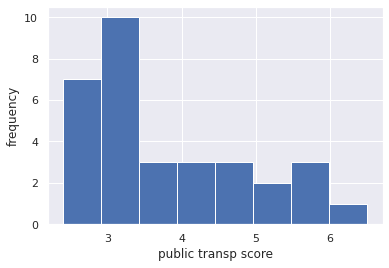

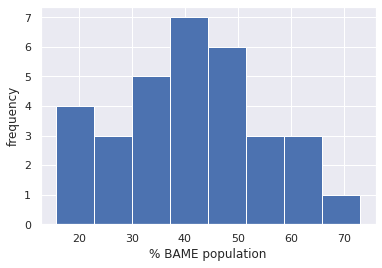

In [51]:
plt.figure(1)
dfD['unempl rate'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('unempl rate')
plt.ylabel("frequency")
#plt.savefig("hist.png")

plt.figure(3)
dfD['% working with degree'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('% working with degree')
plt.ylabel("frequency")

plt.figure(4)
dfD['public transp score'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('public transp score')
plt.ylabel("frequency")

plt.figure(2)
dfD['% BAME population'].hist(bins=8)
#pl.title("diff_perc")
plt.xlabel('% BAME population')
plt.ylabel("frequency")

In [52]:
model_dfD = sm.OLS(endog=dfC[['unempl rate']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_dfD.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            unempl rate   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3.108
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0316
Time:                        17:15:26   Log-Likelihood:                -59.095
No. Observations:                  32   AIC:                             128.2
Df Residuals:                      27   BIC:                             135.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.6867      2.050      3.262      0.003       2.481      10.892
% non English language    -0.0088      0.068     -0.131      0.897      -0.148       0.130
% BAME population          0.0398      0.041      0.979      0.336      -0.044       0.123
% working with degree     -0.0953      0.039     -2.448      0.021      -0.175      -0.015
public transp score        0.7109      0.402      1.768      0.088      -0.114       1.536
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.711
Skew:                           0.243   Prob(JB):                        0.701
Kurtosis:                       2.455   Cond. No.                         484.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual analysis- Model D

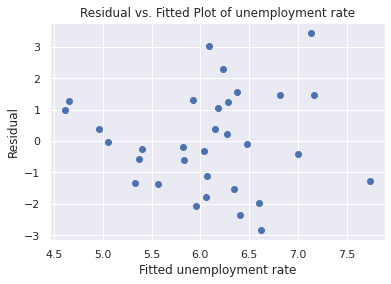

In [101]:
sn.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
plt.scatter(model_dfC.fittedvalues, model_dfD.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

# Residual vs predictor plot 
## % working with degree

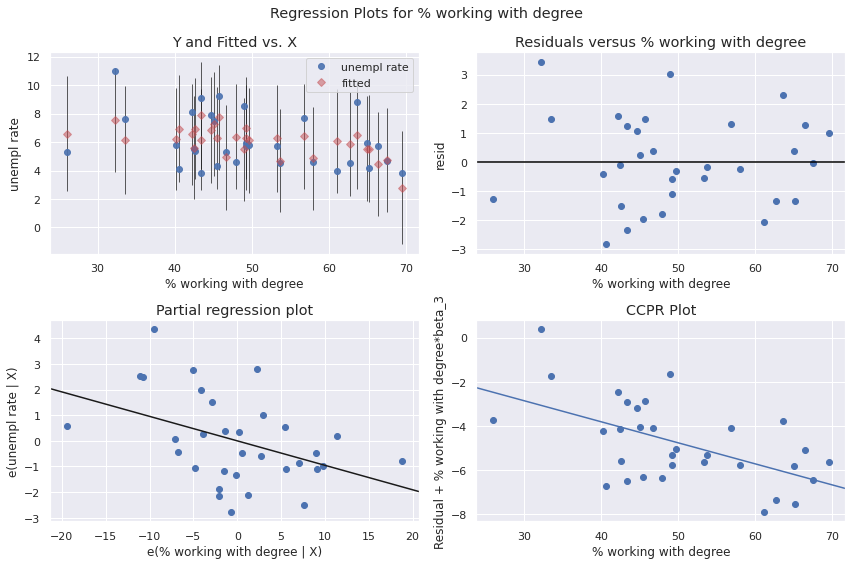

In [102]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_dfD, '% working with degree', fig=fig)

In [ ]:
# Simple linear regression 


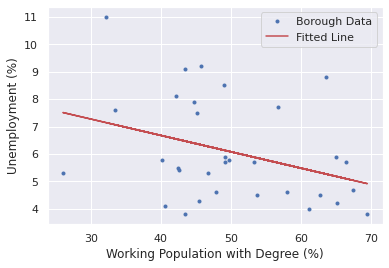

y = -0.06 x + 9.059
Rsq =  0.1204
p-value =  0.0517


In [122]:
# exclude City of London due to missing value
x = df['Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015'][1:]
y = df['Unemployment_rate_(2015)'][1:]

plt.xlabel('Working Population with Degree (%)')
plt.ylabel('Unemployment (%)')

a = plt.plot(x, y, '.', label='Borough Data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)

b = plt.plot(x, x*slope + intercept, 'r', label = 'Fitted Line')

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", round(r_value**2,4))
print("p-value = ", round(p_value,4))